In [ ]:
# ..... get LoF for genes ..... #

In [1]:
library(ggplot2)

In [1]:
jin = read.delim('Jin_CHD_bulk_coexp_spec.csv', sep = ',')
jin[1:3,]

gene  mean_spec disease inheritance
1 A1BG  0.8021342 Non_CHD NA         
2 A1CF  0.9891262 Non_CHD NA         
3 A2ML1 0.7879321 Non_CHD NA

In [3]:
gnomad = read.delim('~/Primate_MTG/gnomad.v2.1.1.lof_metrics.by_gene.txt', sep = '\t')
gnomad[1:2,]

gene  transcript      obs_mis exp_mis oe_mis  mu_mis     possible_mis
1 MED13 ENST00000397786 871     1117.8  0.77921 5.5598e-05 14195       
2 NIPBL ENST00000282516 846     1441.5  0.58688 7.3808e-05 18540       
  obs_mis_pphen exp_mis_pphen oe_mis_pphen ⋯ gene_type      gene_length
1 314           529.75        0.59273      ⋯ protein_coding 122678     
2 158           543.10        0.29092      ⋯ protein_coding 189655     
  exac_pLI exac_obs_lof exac_exp_lof exac_oe_lof brain_expression chromosome
1 1        0             64.393      0.0000000   NA               17        
2 1        1            110.570      0.0090443   NA               5         
  start_position end_position
1 60019966       60142643    
2 36876861       37066515

In [4]:
# get LoF scores
jin$pLI = gnomad$exac_pLI[match(jin$gene, gnomad$gene)]
jin$loeuf = gnomad$exac_oe_lof[match(jin$gene, gnomad$gene)]
jin[1:3,]

gene  mean_spec disease inheritance pLI        loeuf  
1 A1BG  0.8021342 Non_CHD NA          9.0649e-05 0.65033
2 A1CF  0.9891262 Non_CHD NA          3.6197e-03 0.34700
3 A2ML1 0.7879321 Non_CHD NA          1.3290e-22 0.74914

In [5]:
# single cell pseudobulk coexp cons
cons = read.delim('pseudobulk_scores.csv', sep = ',')
cons[1:2,]

gene   score    
1 SPRY2  0.8087578
2 PCDH20 0.8008320

In [6]:
jin$sc = cons$score[match(jin$gene, cons$gene)]
jin[1:3,]

gene  mean_spec disease inheritance pLI        loeuf   sc       
1 A1BG  0.8021342 Non_CHD NA          9.0649e-05 0.65033        NA
2 A1CF  0.9891262 Non_CHD NA          3.6197e-03 0.34700 0.7998821
3 A2ML1 0.7879321 Non_CHD NA          1.3290e-22 0.74914 0.7683261

In [21]:
temp = jin
temp$pli1 = 'none'
temp$pli1[temp$pLI>=0.9] = 'lof'
temp$sc1 = 'other'
temp$sc1[temp$sc>=0.9] = 'cons'
temp$bulk1 = 'other'
temp$bulk1[temp$mean_spec>=0.9] = 'cons'

In [28]:
temp2 = temp %>% group_by(disease, sc1) %>% reframe(count = n())
temp2

# are CHD genes enriched for pLI? coexp cons?
fisher.test(matrix(c(temp2$count[1], temp2$count[2], temp2$count[3], temp2$count[4]), nrow = 2))

disease sc1   count
1 CHD     cons     61
2 CHD     other   152
3 Non_CHD cons   1975
4 Non_CHD other 11943


	Fisher's Exact Test for Count Data

data:  matrix(c(temp2$count[1], temp2$count[2], temp2$count[3], temp2$count[4]), nrow = 2)
p-value = 6.084e-08
alternative hypothesis: true odds ratio is not equal to 1
95 percent confidence interval:
 1.765605 3.300418
sample estimates:
odds ratio 
  2.426474 


In [23]:
table(jin$disease[jin$mean_spec>=0.9 | jin$pLI>=0.9 | jin$sc>=0.9])


    CHD Non_CHD 
    155    8466 

In [7]:
jin$disease = as.factor(jin$disease)

Warning message:
“Removed 588 rows containing non-finite outside the scale range (`stat_boxplot()`).”


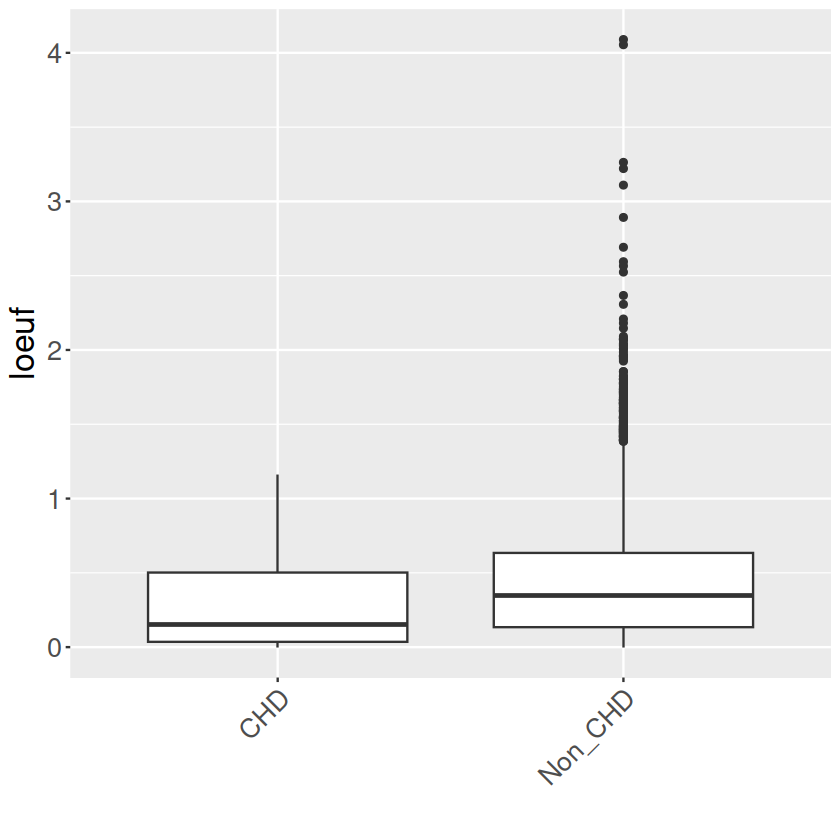

In [8]:
# png('aaa4.png', width = 8, height = 8, res = 300, units = 'in')
ggplot(jin, aes(x = disease, y = loeuf)) + geom_boxplot() + theme(text = element_text(size=20),
        axis.text.x = element_text(angle=45, hjust=1)) + xlab('') #+ ylab('Coexp cons - bulk')
# dev.off()

In [22]:
jin2 = jin[jin$disease=='CHD',]
dim(jin2)

[1] 213   7

In [35]:
jin2$bins = dplyr::ntile(jin2$sc, 4)
jin2$bins = as.factor(jin2$bins)
jin2 <- jin2[!is.na(jin2$bins),]
dim(jin2)

[1] 204   8

Warning message:
“Removed 5 rows containing non-finite values (`stat_boxplot()`).”


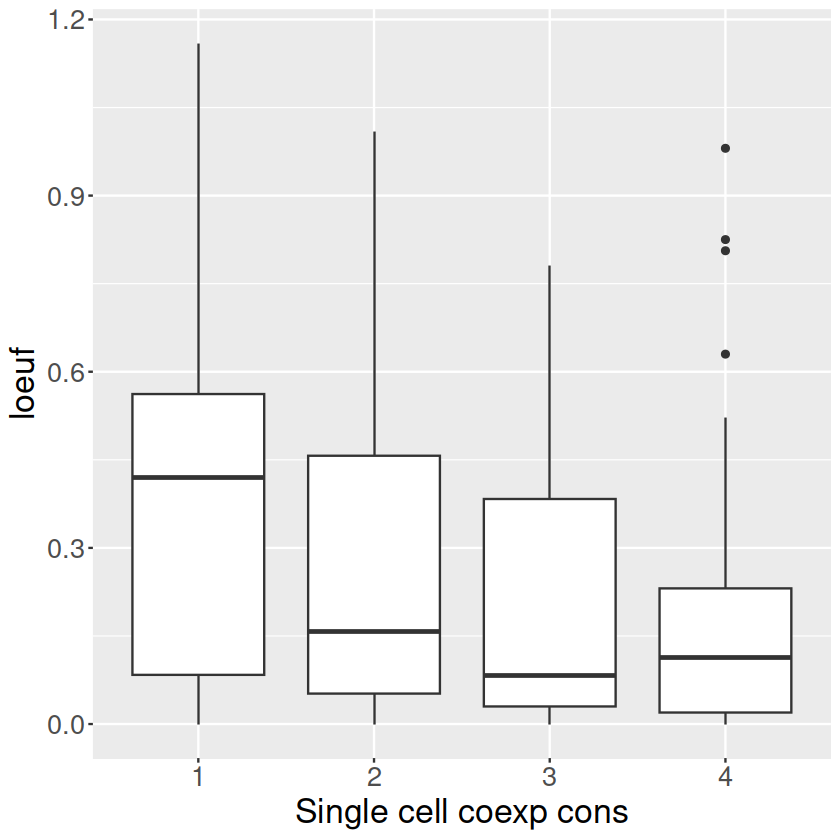

In [46]:
# png('aabb3.png', width = 8, height = 8, res = 300, units = 'in')
ggplot(jin2, aes(x = bins, y = loeuf)) + geom_boxplot() +
theme(text = element_text(size=20)) + xlab('Single cell coexp cons') #+ ylab('Coexp cons - bulk')
# dev.off()

In [51]:
condf = jin2[jin2$pLI>0.9 & jin2$sc>0.9,]
condf <- condf[!is.na(condf$gene),]
dim(condf)
condf[1:3,]

[1] 36  8

gene     mean_spec disease inheritance pLI     loeuf    sc        bins
172 ACTB     0.9387781 CHD     Monoallelic 0.93580 0.000000 0.9253251 4   
235 ADAMTS6  0.8650504 CHD     Biallelic   0.99880 0.131270 0.9756159 4   
773 ARHGAP31 0.9169929 CHD     Monoallelic 0.99963 0.084128 0.9538320 4

In [65]:
condf[condf$sc>0.97,]

gene    mean_spec disease inheritance           pLI     loeuf    
235   ADAMTS6 0.8650504 CHD     Biallelic             0.99880 0.1312700
2430  COL1A1  0.9978657 CHD     Monoallelic           1.00000 0.0429390
2431  COL1A2  0.9553087 CHD     Monoallelic/Biallelic 0.99975 0.1361100
2449  COL5A1  0.9977096 CHD     Monoallelic/Biallelic 1.00000 0.0120070
2450  COL5A2  0.9372266 CHD     Monoallelic           1.00000 0.0280630
4634  GLI3    0.9539010 CHD     Monoallelic           0.99999 0.0261900
7688  NIPBL   0.9600869 CHD     Monoallelic           1.00000 0.0090443
10034 RPL5    0.9910205 CHD     Monoallelic           0.99476 0.0000000
10057 RPS10   0.9664388 CHD     Monoallelic           0.94646 0.0000000
10066 RPS19   0.9896256 CHD     Monoallelic           0.92399 0.0000000
10090 RPS7    0.9919365 CHD     Monoallelic           0.90709 0.0000000
      sc        bins
235   0.9756159 4   
2430  0.9854007 4   
2431  0.9747453 4   
2449  0.9752024 4   
2450  0.9779618 4   
4634  0.9775525 4   
7688  0.9895390 4   
10034 0.9830716 4   
10057 0.9901864 4   
10066 0.9950744 4   
10090 0.9793885 4

In [62]:
table(condf$inheritance)


            Biallelic           Monoallelic Monoallelic/Biallelic 
                    5                    26                     3 
             X-linked 
                    2 

In [52]:
source('~/septation/gene_set_enrichment.R')
ginfo = read.delim('/data/CoCoCoNet/geneInfo/human_info.csv', sep = ',')

In [58]:
glist2 = ginfo$NetworkIDs[match(condf$gene, ginfo$GeneSymbol)]
gse = gene_set_enrichment(glist2, 'human')
head(gse)

GO_term    description                       N_sample N_univ
GO:0072359 GO:0072359 circulatory system development    23       925   
GO:0007507 GO:0007507 heart development                 20       553   
GO:0001944 GO:0001944 vasculature development           18       550   
GO:0072358 GO:0072358 cardiovascular system development 18       560   
GO:0001568 GO:0001568 blood vessel development          17       527   
GO:0060840 GO:0060840 artery development                11        93   
           pvals        adj_pvals    sig 
GO:0072359 5.054261e-24 4.294363e-20 TRUE
GO:0007507 9.553644e-24 4.294363e-20 TRUE
GO:0001944 1.998415e-20 5.988584e-17 TRUE
GO:0072358 2.757598e-20 6.197702e-17 TRUE
GO:0001568 3.986204e-19 7.167194e-16 TRUE
GO:0060840 1.095820e-18 1.641904e-15 TRUE

In [74]:
gomat = read.delim("/data/CoCoCoNet/gene2go/human_gene2go.csv", sep = ' ')
gomat <- gomat[which(gomat$NetworkIDs %in% glist2),]
gomat <- gomat[gomat$GO_term %in% gse$GO_term[1:10],]

In [78]:
table(gomat$NetworkIDs)


ENSG00000049192 ENSG00000075624 ENSG00000077782 ENSG00000079805 ENSG00000089225 
              6               1               8               6               9 
ENSG00000101384 ENSG00000106571 ENSG00000107882 ENSG00000108821 ENSG00000117298 
              7              10               8               4               5 
ENSG00000130635 ENSG00000138829 ENSG00000139174 ENSG00000139219 ENSG00000148400 
              6               3               8               5              10 
ENSG00000151067 ENSG00000156574 ENSG00000157933 ENSG00000164190 ENSG00000164692 
              5               6               4               5               4 
ENSG00000166147 ENSG00000168542 ENSG00000169946 ENSG00000171316 ENSG00000171863 
              3               7               6              10               2 
ENSG00000186642 ENSG00000196712 ENSG00000196924 
              6               6               1 